<a href="https://colab.research.google.com/github/PragyaAnanth/GeneAssociationAnalysis/blob/main/GAAProject_Manasa_Pragya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 18MAT333 - Graph Analytics and Algorithms
### **Graph Network Analysis — A Project**
# **Gene Association Analysis**


**Faculty:** <br>
Dr. Somasundaram K <br>
Professor, Department of Mathematics<br>
Amrita School of Engineering Coimbatore <br>
<br>

**Student Details:** 
### **Pragya Ananth, CB.SC.I5DAS18027**
### **Pendyala Manasa, CB.SC.I5DAS18043**
**Integrated M.Sc. Data Science** <br>

# Library imports and data reading

In [ ]:
import pandas as pd
import numpy as np
import itertools
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Adjacency_matrix.xlsx')
df.head()

,Unnamed: 0,Unnamed: 1,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
0,NaN,NaN,PROZ,NQO1,GGCX,TACR1,GCG,CFTR,F2,PTK2B,GSK3B,RELN,CAT,CYCS,CASP3,PARP1,AKT1,TP53,BDNF,DKK1,BCL2L1,ABCB1,FOS,HMOX2,ESR1,PGR,NR3C1,CDK1,PTGS2,PLA2G2A,CYP2C9,CYP1B1,UGT1A1,CYP2A6,MAOA,MAOB,AOX1,CYP2B6,PLA2G1B,ABAT,ABCCB,KCNJ11,RXFP4,GABBR2,KCNJ6,GABBR1,CXCL10,IL8,TIMP1,MMP9,IL1B,STAT1,SPP1
1,1.0,PROZ,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,NQO1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,GGCX,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,TACR1,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop(columns=['Unnamed: 0','Unnamed: 1'],axis=1,inplace=True)
nodes=df.iloc[0]
df.drop(df.index[[0]],axis=0,inplace=True)

In [ ]:
list(nodes)

['PROZ',
 'NQO1',
 'GGCX',
 'TACR1',
 'GCG',
 'CFTR',
 'F2',
 'PTK2B',
 'GSK3B',
 'RELN',
 'CAT',
 'CYCS',
 'CASP3',
 'PARP1',
 'AKT1',
 'TP53',
 'BDNF',
 'DKK1',
 'BCL2L1',
 'ABCB1',
 'FOS',
 'HMOX2',
 'ESR1',
 'PGR',
 'NR3C1',
 'CDK1',
 'PTGS2',
 'PLA2G2A',
 'CYP2C9',
 'CYP1B1',
 'UGT1A1',
 'CYP2A6',
 'MAOA',
 'MAOB',
 'AOX1',
 'CYP2B6',
 'PLA2G1B',
 'ABAT',
 'ABCCB',
 'KCNJ11',
 'RXFP4',
 'GABBR2',
 'KCNJ6',
 'GABBR1',
 'CXCL10',
 'IL8',
 'TIMP1',
 'MMP9',
 'IL1B',
 'STAT1',
 'SPP1']

In [ ]:
df.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
1,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,1,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
adj1=df.fillna(value=0)
adj2=df.fillna(value=float('inf'))

In [ ]:
adj1.to_excel("/content/drive/My Drive/dffilled.xlsx")

In [ ]:
adj1.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
adj2.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51
1,0.0,1.0,1.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
2,inf,inf,1.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
3,1.0,1.0,inf,inf,inf,inf,1.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
4,inf,inf,inf,inf,1.0,1.0,1.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf
5,inf,inf,inf,1.0,inf,inf,1.0,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf,inf


In [ ]:
adjmat1=adj1.to_numpy()
adjmat2=adj2.to_numpy()

In [ ]:
adj3=adjmat2

#Betweenness Centrality

In [ ]:
def betweeness_centrality(arr,adj1,centrality_vertex):
    final_list = []
    total_path = []
    for i in range(2,len(arr)):
        final_list = final_list + list(itertools.permutations(arr,i))
        total_path = total_path + list(itertools.permutations(arr,i))
    for path in total_path:
        for i in range(len(path)):
            if((i != (len(path)-1))):
                if(adj1[int(path[i])][int(path[i+1])] == 0):
                    final_list.remove(path)
                    break
    dist = []
    for path in final_list:
        length = 0
        for i in range(len(path) -1):
            length = length + adj1[int(path[i])][int(path[i+1])]
        if(length > 0):
            dist.append([length,path])
    dist.sort(key = lambda x: x[0])
    pairs_list = list(itertools.permutations(arr,2))
    pair_count = 0
    total_paths = []
    for pair in pairs_list:
        total_paths = []
        source = pair[0]
        destination = pair[1]
        for dist_path in dist:
            if((source != centrality_vertex) & (source != centrality_vertex)):
                if(dist_path[1][0] == source):
                    if(dist_path[1][-1] == destination):
                        total_paths.append(dist_path)
    
        total_number = 0
        number_with_centrality_vertex = 0
        for path in total_paths:
            shortest = min(total_paths)
            if(path[0] == shortest[0]):
                total_number = total_number + 1
                temp = list(path[1])
                temp.pop(0)
                temp.pop(-1)
                if(centrality_vertex in temp):
                    number_with_centrality_vertex = number_with_centrality_vertex + 1
                pair_count = pair_count + (number_with_centrality_vertex)/(total_number)
    return pair_count/2

In [ ]:
betweeness_centrality(nodes,adj.tolist(),'CYCS')

In [ ]:
nodez=list(nodes)
graph = nx.from_numpy_matrix(adjmat1)
labeling = nx.betweenness_centrality(graph, normalized=False)
print("The centralities: ")
labeling

The centralities: 


{0: 0.0,
 1: 0.0,
 2: 92.0,
 3: 0.5,
 4: 0.0,
 5: 0.0,
 6: 261.5,
 7: 4.0,
 8: 23.183333333333334,
 9: 0.0,
 10: 8.5,
 11: 93.0,
 12: 47.0,
 13: 0.0,
 14: 120.53333333333332,
 15: 561.3833333333333,
 16: 0.0,
 17: 0.0,
 18: 133.76666666666665,
 19: 0.0,
 20: 783.0666666666667,
 21: 0.0,
 22: 88.66666666666667,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 407.0,
 27: 0.0,
 28: 120.0,
 29: 0.0,
 30: 3.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 137.0,
 35: 163.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 23.0,
 42: 0.0,
 43: 23.0,
 44: 0.0,
 45: 215.0,
 46: 47.0,
 47: 0.0,
 48: 0.0,
 49: 49.083333333333336,
 50: 302.81666666666666}

In [ ]:
labeling = list(labeling.items())
labeling = sorted(labeling, key=lambda n: n[1], reverse=True)
arr=np.array([nodez[n[0]] for n in labeling])
print("Genes in their decreasing order of centrality: \n",arr)

Genes in their decreasing order of centrality: 
 ['FOS' 'TP53' 'PTGS2' 'SPP1' 'F2' 'IL8' 'CYP2B6' 'AOX1' 'BCL2L1' 'AKT1'
 'CYP2C9' 'CYCS' 'GGCX' 'ESR1' 'STAT1' 'CASP3' 'TIMP1' 'GSK3B' 'GABBR2'
 'GABBR1' 'CAT' 'PTK2B' 'UGT1A1' 'TACR1' 'PROZ' 'NQO1' 'GCG' 'CFTR' 'RELN'
 'PARP1' 'BDNF' 'DKK1' 'ABCB1' 'HMOX2' 'PGR' 'NR3C1' 'CDK1' 'PLA2G2A'
 'CYP1B1' 'CYP2A6' 'MAOA' 'MAOB' 'PLA2G1B' 'ABAT' 'ABCCB' 'KCNJ11' 'RXFP4'
 'KCNJ6' 'CXCL10' 'MMP9' 'IL1B']


#Clustering Centrality

In [ ]:
def Clustering_Coefficient(adj_mat,nodes_list):
    col=0
    n=len(adj_mat)
    clus_coeff=[]
    for i in range(n):
        col = [sub[i] for sub in adj_mat]
        #print(col)
        deg=np.sum(col)
        #print(deg)
        loc_clus_coeff=deg*2/(n*(n-1))
        clus_coeff.append(loc_clus_coeff)
        print("Clustering coefficient of vertex {} is {}".format(nodes_list[i],clus_coeff[i]))
    print("\n")
    print("Clustering coefficient of the whole network is {}".format((np.sum(clus_coeff))/n))

In [ ]:
Clustering_Coefficient(adjmat1,nodez)

Clustering coefficient of vertex PROZ is 0.000784313725490196
Clustering coefficient of vertex NQO1 is 0.001568627450980392
Clustering coefficient of vertex GGCX is 0.002352941176470588
Clustering coefficient of vertex TACR1 is 0.002352941176470588
Clustering coefficient of vertex GCG is 0.001568627450980392
Clustering coefficient of vertex CFTR is 0.001568627450980392
Clustering coefficient of vertex F2 is 0.00392156862745098
Clustering coefficient of vertex PTK2B is 0.001568627450980392
Clustering coefficient of vertex GSK3B is 0.002352941176470588
Clustering coefficient of vertex RELN is 0.000784313725490196
Clustering coefficient of vertex CAT is 0.001568627450980392
Clustering coefficient of vertex CYCS is 0.002352941176470588
Clustering coefficient of vertex CASP3 is 0.000784313725490196
Clustering coefficient of vertex PARP1 is 0.0
Clustering coefficient of vertex AKT1 is 0.004705882352941176
Clustering coefficient of vertex TP53 is 0.006274509803921568
Clustering coefficient of

# Closeness Centrality

In [ ]:
 def floyd_warshall(adj):
      n=len(adj)
      distance = adj
      for i in range(n):
        for j in range(n):
          if(distance[i][j]==0)&(i!=j):
            distance[i][j]=9999
      for k in range(n):
          for i in range(n):
              for j in range(n):
                  distance[i][j] = min(distance[i][j], distance[i][k] + distance[k][j])
      return distance

 def closeness_centrality(adj, vertices):
      matrix = list(floyd_warshall(adj))
      vertices = list(vertices)
      cc = []
      for vertex in vertices:
        sum = 0
        for i in range(len(vertices)):
          if(vertex==vertices[i]):
            index = i
        for j in range(len(vertices)):
          # print(type(matrix[index][j]))
          sum+=matrix[index][j]
        cc.append((len(vertices)-1)/sum)
        print("Closeness centrality of the vertex '"+vertex+"' is "+str((len(vertices)-1)/sum))
      return cc

In [ ]:
arr =closeness_centrality(adjmat1, nodez)
# d=floyd_warshall(adj)
# type(d)

Closeness centrality of the vertex 'PROZ' is 0.0012418040929862905
Closeness centrality of the vertex 'NQO1' is 0.0012417732522041476
Closeness centrality of the vertex 'GGCX' is 0.0012431626056688214
Closeness centrality of the vertex 'TACR1' is 0.001243100790612103
Closeness centrality of the vertex 'GCG' is 0.0012430698853889567
Closeness centrality of the vertex 'CFTR' is 0.0012430698853889567
Closeness centrality of the vertex 'F2' is 0.001244431170511959
Closeness centrality of the vertex 'PTK2B' is 0.0012442763288871193
Closeness centrality of the vertex 'GSK3B' is 0.0012451749470800647
Closeness centrality of the vertex 'RELN' is 0.0012439977110442117
Closeness centrality of the vertex 'CAT' is 0.0012440596153367668
Closeness centrality of the vertex 'CYCS' is 0.0012439048661558364
Closeness centrality of the vertex 'CASP3' is 0.0016532204734823436
Closeness centrality of the vertex 'PARP1' is 0.002463903809195289
Closeness centrality of the vertex 'AKT1' is 0.00124539204941715

In [ ]:
sorted(arr)

[0.00010205081314087911,
 0.00010205081314087911,
 0.000111120247664808,
 0.00011112074157538098,
 0.00011112074157538098,
 0.00011112074157538098,
 0.00011112074157538098,
 0.00011112098853231398,
 0.0012417732522041476,
 0.0012418040929862905,
 0.001242544731610338,
 0.0012425756107259127,
 0.0012425756107259127,
 0.0012430698853889567,
 0.0012430698853889567,
 0.001243100790612103,
 0.0012431626056688214,
 0.0012436882819690073,
 0.0012438429772625504,
 0.0012438739209393735,
 0.0012439048661558364,
 0.0012439048661558364,
 0.0012439358129120537,
 0.0012439977110442117,
 0.0012440596153367668,
 0.0012442453651860146,
 0.0012442763288871193,
 0.001244431170511959,
 0.0012448339391525171,
 0.0012448339391525171,
 0.0012449579204222897,
 0.0012449579204222897,
 0.0012449579204222897,
 0.001245019920318725,
 0.0012450509225827337,
 0.0012451749470800647,
 0.0012452369685951236,
 0.0012452369685951236,
 0.0012452369685951236,
 0.0012452369685951236,
 0.001245298996289009,
 0.001245392049

In [ ]:

closeCent =nx.closeness_centrality(graph)

In [ ]:
closeCent

{0: 0.16282685512367492,
 1: 0.16282685512367492,
 2: 0.19443037974683544,
 3: 0.1928033472803347,
 4: 0.192,
 5: 0.192,
 6: 0.23752577319587628,
 7: 0.2315577889447236,
 8: 0.27428571428571424,
 9: 0.22368932038834952,
 10: 0.2304,
 11: 0.2269950738916256,
 12: 0.1858064516129032,
 13: 0.15620338983050847,
 14: 0.28981132075471694,
 15: 0.36,
 16: 0.2633142857142857,
 17: 0.2633142857142857,
 18: 0.28444444444444444,
 19: 0.2633142857142857,
 20: 0.3808264462809917,
 21: 0.27428571428571424,
 22: 0.30117647058823527,
 23: 0.2304,
 24: 0.2826993865030675,
 25: 0.27428571428571424,
 26: 0.3156164383561644,
 27: 0.2518032786885246,
 28: 0.26033898305084746,
 29: 0.20756756756756758,
 30: 0.21333333333333332,
 31: 0.21235023041474654,
 32: 0.17723076923076925,
 33: 0.17723076923076925,
 34: 0.21532710280373832,
 35: 0.2618181818181818,
 36: 0.2518032786885246,
 37: 0.17655172413793102,
 38: 0.02,
 39: 0.02,
 40: 0.22925373134328356,
 41: 0.2304,
 42: 0.1873170731707317,
 43: 0.2304,
 44: 

In [ ]:
sorted(closeCent.values())

[0.02,
 0.02,
 0.15620338983050847,
 0.16282685512367492,
 0.16282685512367492,
 0.17655172413793102,
 0.17723076923076925,
 0.17723076923076925,
 0.1858064516129032,
 0.1873170731707317,
 0.192,
 0.192,
 0.1928033472803347,
 0.19443037974683544,
 0.20756756756756758,
 0.21235023041474654,
 0.21333333333333332,
 0.21532710280373832,
 0.21633802816901407,
 0.22368932038834952,
 0.2269950738916256,
 0.22925373134328356,
 0.22925373134328356,
 0.2304,
 0.2304,
 0.2304,
 0.2304,
 0.2315577889447236,
 0.23752577319587628,
 0.2518032786885246,
 0.2518032786885246,
 0.26033898305084746,
 0.2618181818181818,
 0.2633142857142857,
 0.2633142857142857,
 0.2633142857142857,
 0.27428571428571424,
 0.27428571428571424,
 0.27428571428571424,
 0.27428571428571424,
 0.2775903614457831,
 0.2826993865030675,
 0.28444444444444444,
 0.28981132075471694,
 0.28981132075471694,
 0.2916455696202532,
 0.2935031847133758,
 0.30117647058823527,
 0.3156164383561644,
 0.36,
 0.3808264462809917]

# Visualization

In [ ]:
nodez=list(nodes)
graph = nx.from_numpy_matrix(adjmat1)
labeling = nx.betweenness_centrality(graph, normalized=False)
print("The centralities: ")
labeling

In [ ]:
btw_list=labeling
#print(btw_list)
#nodez,btw_list
cluscoef=nx.clustering(graph)
cluscoef
clojj=nx.closeness_centrality(graph)
btw_list

{0: 0.0,
 1: 0.0,
 2: 92.0,
 3: 0.5,
 4: 0.0,
 5: 0.0,
 6: 261.5,
 7: 4.0,
 8: 23.183333333333334,
 9: 0.0,
 10: 8.5,
 11: 93.0,
 12: 47.0,
 13: 0.0,
 14: 120.53333333333332,
 15: 561.3833333333333,
 16: 0.0,
 17: 0.0,
 18: 133.76666666666665,
 19: 0.0,
 20: 783.0666666666667,
 21: 0.0,
 22: 88.66666666666667,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 407.0,
 27: 0.0,
 28: 120.0,
 29: 0.0,
 30: 3.0,
 31: 0.0,
 32: 0.0,
 33: 0.0,
 34: 137.0,
 35: 163.0,
 36: 0.0,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 23.0,
 42: 0.0,
 43: 23.0,
 44: 0.0,
 45: 215.0,
 46: 47.0,
 47: 0.0,
 48: 0.0,
 49: 49.083333333333336,
 50: 302.81666666666666}

In [ ]:
datum={
    "Gene nodes": nodez,
    "BetweennessC": list(btw_list.values()),
    "ClusteringCoef":list(cluscoef.values()),
    "ClosenessC":list(clojj.values())
}
data_pm=pd.DataFrame.from_dict(datum)
data_pm.head()

,Gene nodes,BetweennessC,ClusteringCoef,ClosenessC
0,PROZ,0.0,1.000000,0.162827
1,NQO1,0.0,1.000000,0.162827
2,GGCX,92.0,0.333333,0.194430
3,TACR1,0.5,0.666667,0.192803
4,GCG,0.0,1.000000,0.192000


In [ ]:
data_pm.to_excel("/content/drive/My Drive/AWESOMEMANASAPRAGYA.xlsx")

# Rough work

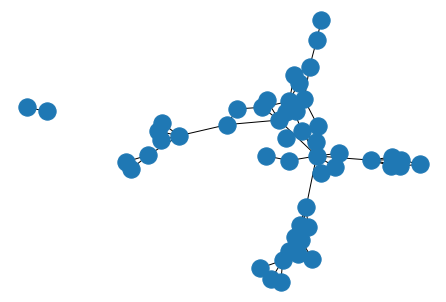

In [ ]:
nx.draw(graph)
plt.show()

In [ ]:
import matplotlib.pyplot as plt

def print_graph(graph):
    """ prints the graph"""

    # stores the nodes and their name attributes in a dictionary
    nodes_names = nx.get_node_attributes(graph, "name")
    plt.ion()
    pos = nx.spring_layout(graph)

    # draw without labels, cuz it would label them with their adress, since we
    nx.draw(graph, pos, with_labels=False)

    # draw the label with the nodes_names containing the name attribute
    labels = nx.draw_networkx_labels(graph, pos, nodes_names)
    plt.show()

def setup_sending(graph):
    print_graph(graph)

    ###some code doing calculations....

    raw_input('Press enter to continue')

##def main():
    #G=nx.dodecahedral_graph()
    ##setup_sending(graph)

##if __name__ == '__main__':
 ##   main()

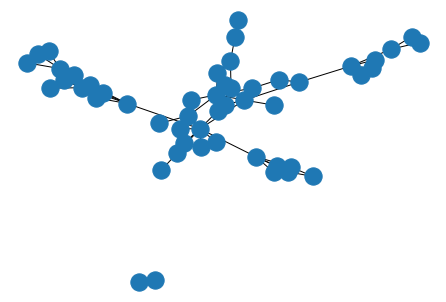

In [ ]:
print_graph(graph)

In [ ]:
cluscoef=nx.clustering(graph)

In [ ]:
cluscoef

{0: 1.0,
 1: 1.0,
 2: 0.3333333333333333,
 3: 0.6666666666666666,
 4: 1.0,
 5: 1.0,
 6: 0.2,
 7: 0,
 8: 0.3333333333333333,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0.13333333333333333,
 15: 0.07142857142857142,
 16: 0,
 17: 0,
 18: 0.16666666666666666,
 19: 0,
 20: 0.022222222222222223,
 21: 0,
 22: 0.16666666666666666,
 23: 0,
 24: 1.0,
 25: 0,
 26: 0.6,
 27: 1.0,
 28: 0.5714285714285714,
 29: 1.0,
 30: 0.7,
 31: 1.0,
 32: 1.0,
 33: 1.0,
 34: 0.3333333333333333,
 35: 0.4642857142857143,
 36: 1.0,
 37: 0,
 38: 0,
 39: 0,
 40: 1.0,
 41: 0.7,
 42: 1.0,
 43: 0.7,
 44: 1.0,
 45: 0.6,
 46: 0,
 47: 0,
 48: 0,
 49: 0,
 50: 0}